# COVID-19 Vaccinations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

#### Gather data from https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv

#### See codebook here: https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv

In [4]:
df_world = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv', parse_dates=['date']).set_index(['location', 'date']).sort_index()
df_world

iso_code continent  total_cases  new_cases  \
location    date                                                    
Afghanistan 2020-02-24      AFG      Asia          1.0        1.0   
            2020-02-25      AFG      Asia          1.0        0.0   
            2020-02-26      AFG      Asia          1.0        0.0   
            2020-02-27      AFG      Asia          1.0        0.0   
            2020-02-28      AFG      Asia          1.0        0.0   
...                         ...       ...          ...        ...   
Zimbabwe    2021-03-23      ZWE    Africa      36717.0       33.0   
            2021-03-24      ZWE    Africa      36749.0       32.0   
            2021-03-25      ZWE    Africa      36778.0       29.0   
            2021-03-26      ZWE    Africa      36805.0       27.0   
            2021-03-27      ZWE    Africa      36818.0       13.0   

                        new_cases_smoothed  total_deaths  new_deaths  \
location    date                                                       
Afghanistan 2020-02-24                 NaN           NaN         NaN   
            2020-02-25                 NaN           NaN         NaN   
            2020-02-26                 NaN           NaN         NaN   
            2020-02-27                 NaN           NaN         NaN   
            2020-02-28                 NaN           NaN         NaN   
...                                    ...           ...         ...   
Zimbabwe    2021-03-23              26.000        1516.0         2.0   
            2021-03-24              28.143        1516.0         0.0   
            2021-03-25              23.857        1518.0         2.0   
            2021-03-26              21.857        1518.0         0.0   
            2021-03-27              22.286        1519.0         1.0   

                        new_deaths_smoothed  total_cases_per_million  \
location    date                                                       
Afghanistan 2020-02-24                  NaN                    0.026   
            2020-02-25                  NaN                    0.026   
            2020-02-26                  NaN                    0.026   
            2020-02-27                  NaN                    0.026   
            2020-02-28                  NaN                    0.026   
...                                     ...                      ...   
Zimbabwe    2021-03-23                1.286                 2470.375   
            2021-03-24                1.143                 2472.528   
            2021-03-25                1.286                 2474.479   
            2021-03-26                1.143                 2476.296   
            2021-03-27                1.286                 2477.170   

                        new_cases_per_million  ...  gdp_per_capita  \
location    date                               ...                   
Afghanistan 2020-02-24                  0.026  ...        1803.987   
            2020-02-25                  0.000  ...        1803.987   
            2020-02-26                  0.000  ...        1803.987   
            2020-02-27                  0.000  ...        1803.987   
            2020-02-28                  0.000  ...        1803.987   
...                                       ...  ...             ...   
Zimbabwe    2021-03-23                  2.220  ...        1899.775   
            2021-03-24                  2.153  ...        1899.775   
            2021-03-25                  1.951  ...        1899.775   
            2021-03-26                  1.817  ...        1899.775   
            2021-03-27                  0.875  ...        1899.775   

                        extreme_poverty  cardiovasc_death_rate  \
location    date                                                 
Afghanistan 2020-02-24              NaN                597.029   
            2020-02-25              NaN                597.029   
            2020-02-26              NaN                597.029   
          

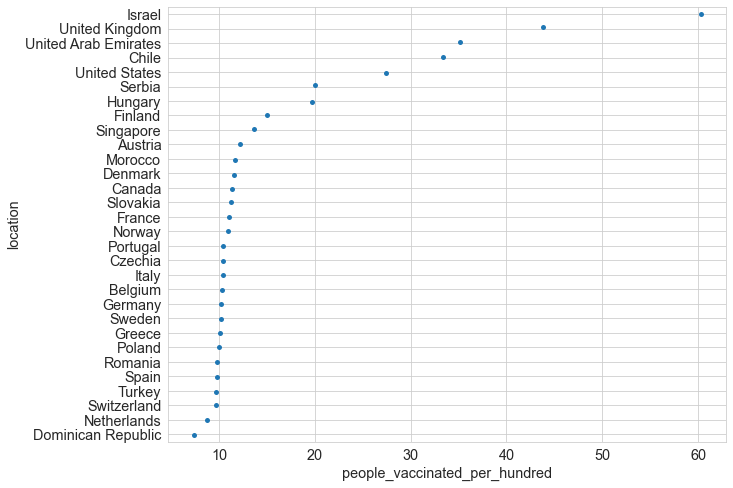

In [5]:
df_plot = df_world[df_world.population > 5000000].loc[set(df_world.index.get_level_values('location')).difference(['Africa','World', 'Europe','Asia', 'European Union', 'South America', 'North America'])].sort_index().reset_index().groupby('location').last().nlargest(30, 'people_vaccinated_per_hundred')
fig, ax = plt.subplots(figsize=(10,8))
sns.stripplot(data=df_plot, y=df_plot.index, x='people_vaccinated_per_hundred', color='C0', size=5)
ax.yaxis.grid()

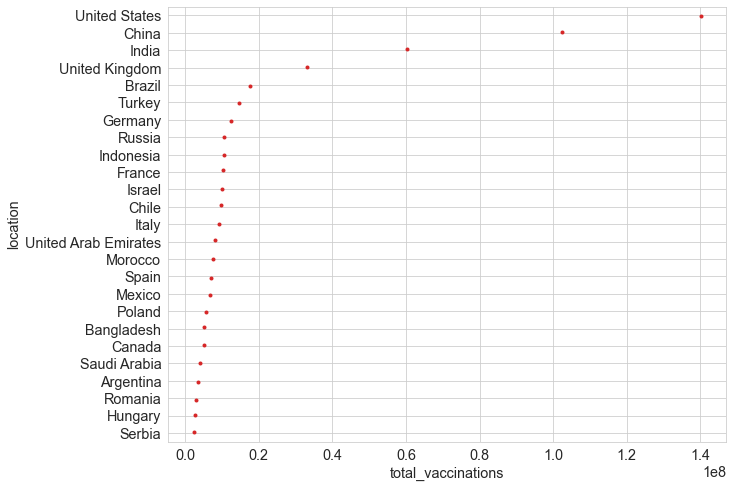

In [6]:
df_plot = df_world[df_world.population > 5000000].loc[set(df_world.index.get_level_values('location')).difference(['Africa','World', 'Europe','Asia', 'European Union', 'South America', 'North America'])].sort_index().reset_index().groupby('location').last().nlargest(25, 'total_vaccinations')
fig, ax = plt.subplots(figsize=(10,8))
sns.stripplot(data=df_plot, y=df_plot.index, x='total_vaccinations', color='C3', size=4)
ax.yaxis.grid()

In [7]:
countries_with_vacc_data = df_world.sort_index().reset_index().groupby('location').last()['people_vaccinated_per_hundred'].dropna().index.to_list()

AxesSubplot(0.398529,0.657941;0.227941x0.222059)


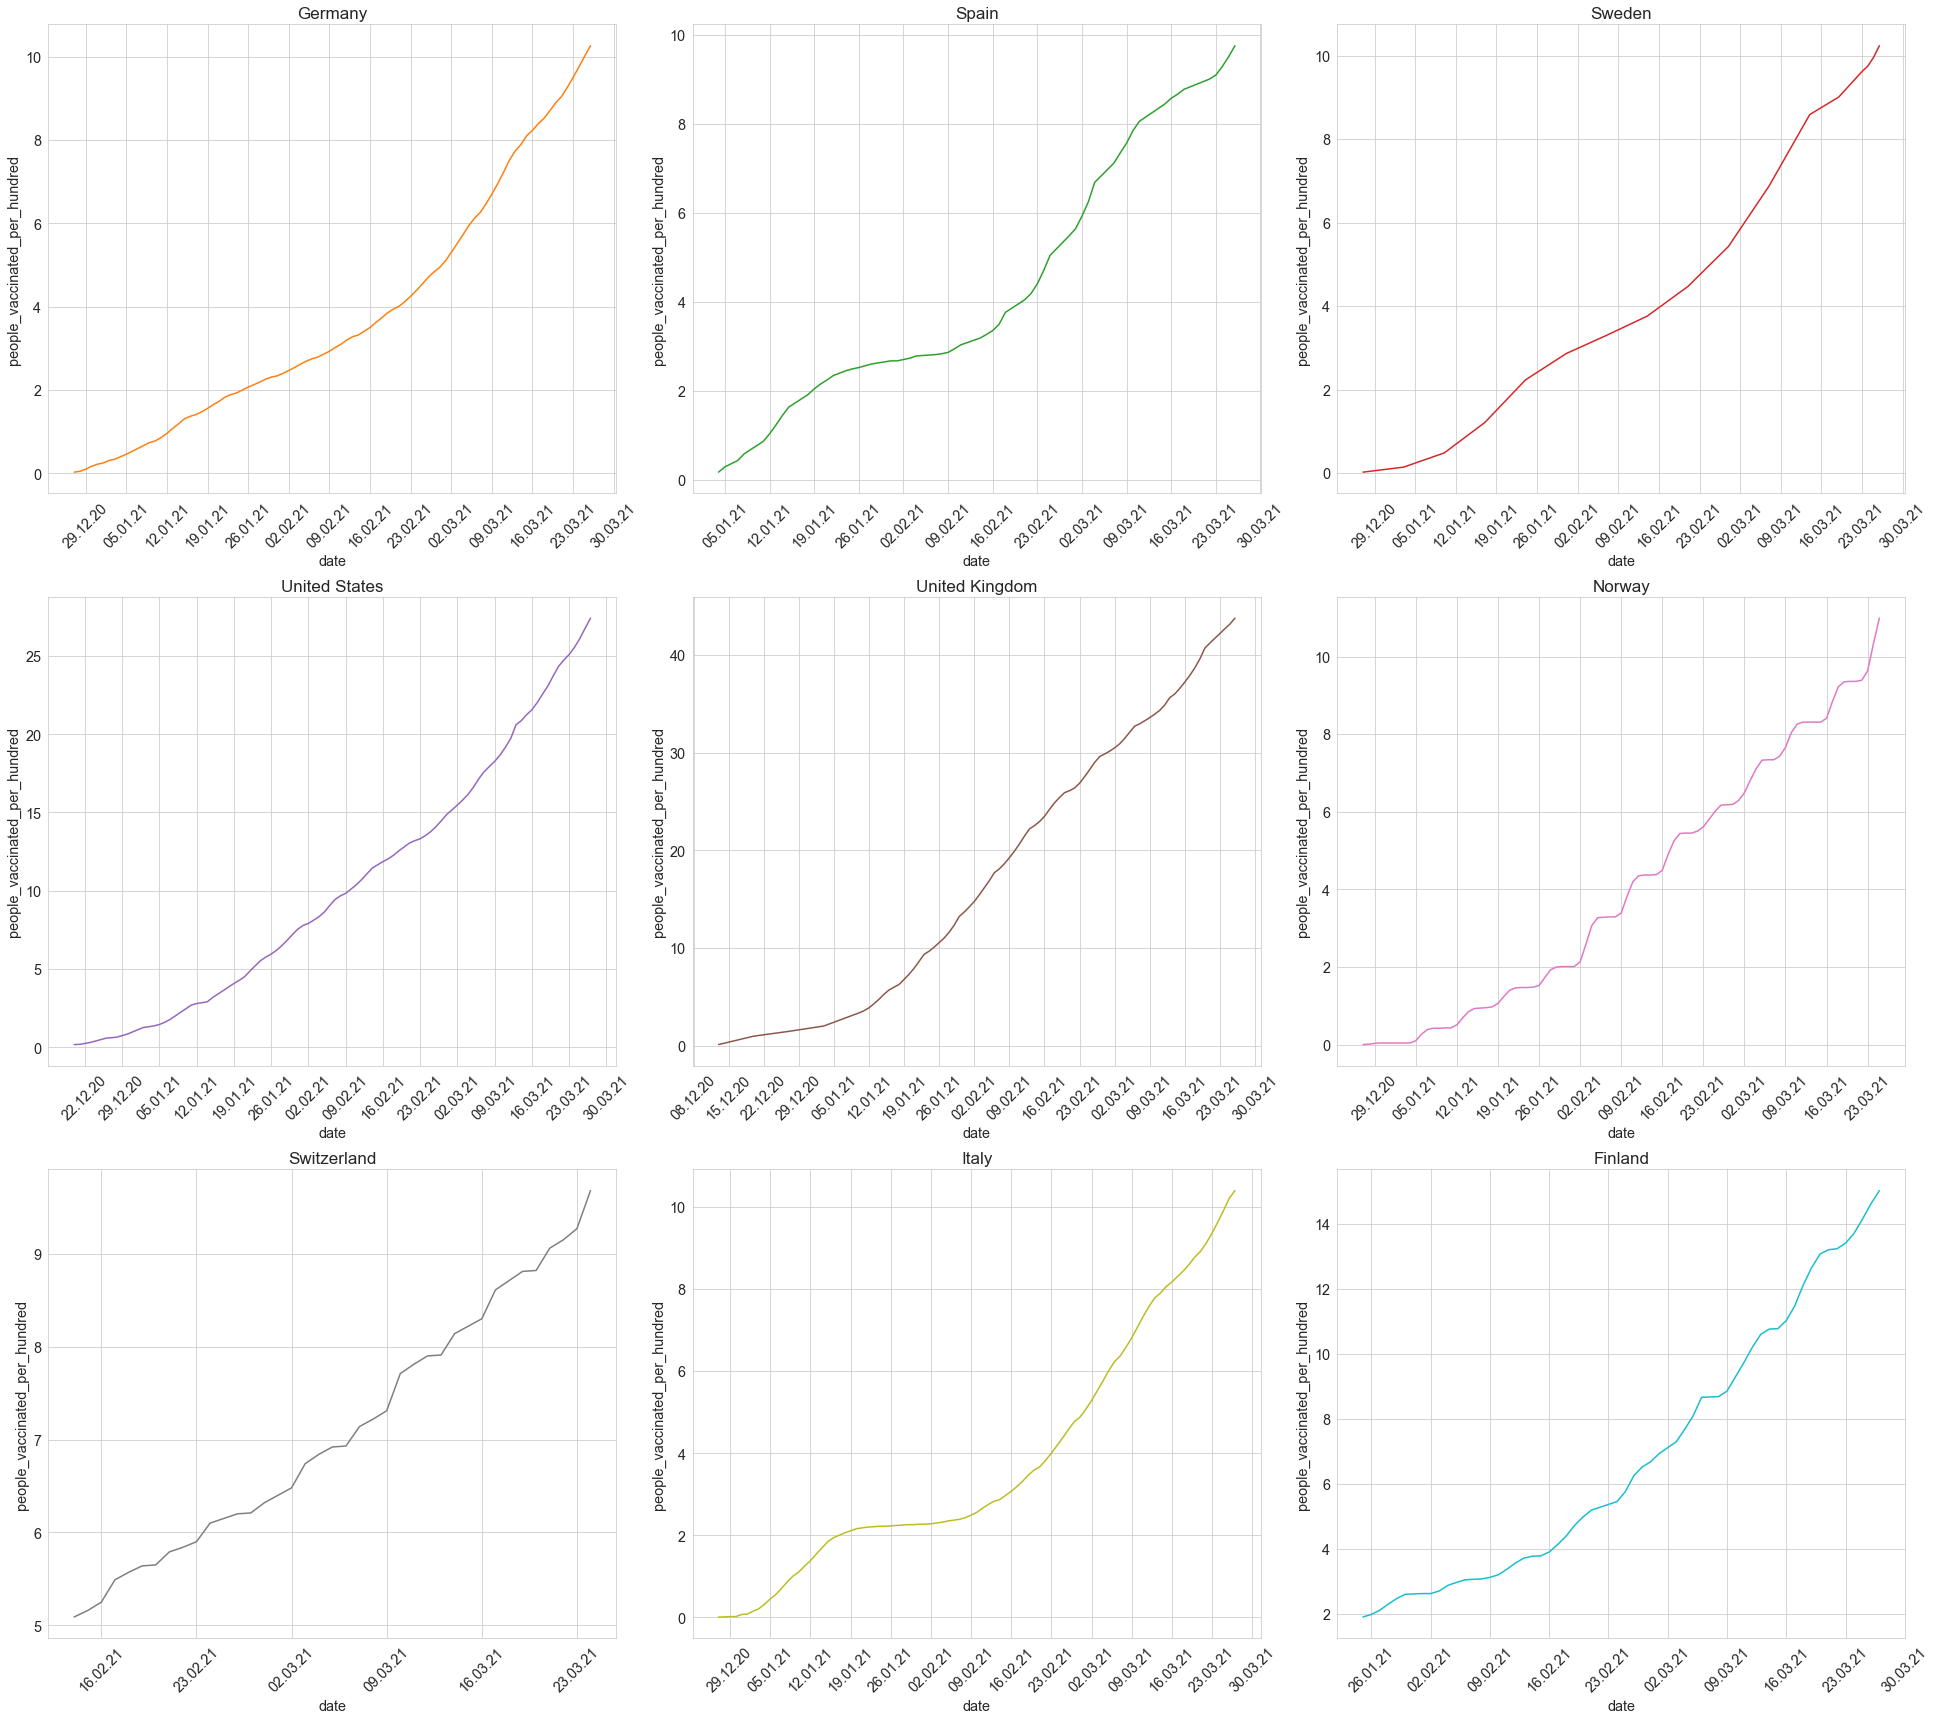

In [46]:
cols, rows = 3,3
countries = np.random.choice(df_world.loc[countries_with_vacc_data].index.get_level_values(0).drop_duplicates().to_list(), cols*rows)
countries = ['Germany', 'Spain', 'Sweden', 'United States', 'United Kingdom', 'Norway', 'Switzerland', 'Italy', 'Finland']

fig, axes = plt.subplots(rows, cols , figsize=(cols*9,rows*7 +3), sharey='row', sharex=True)
print(axes[0][1])
for i, country in enumerate(countries, 1):
    ax = plt.subplot(rows, cols, i)
    sns.lineplot(data = df_world.loc[country], x=df_world.loc[country].index, y='people_vaccinated_per_hundred', color=sns.color_palette()[i], ax = ax )
    ax.set_title(country, fontsize=17)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
    ax.xaxis.set_tick_params(rotation=45)
    #ax.set_ylim(ymin=0)
fig.tight_layout()


In [21]:
df_world['new_vaccinations_rate'] = df_world['new_vaccinations'] / df_world['population']

<AxesSubplot:xlabel='date', ylabel='new_vaccinations_rate'>

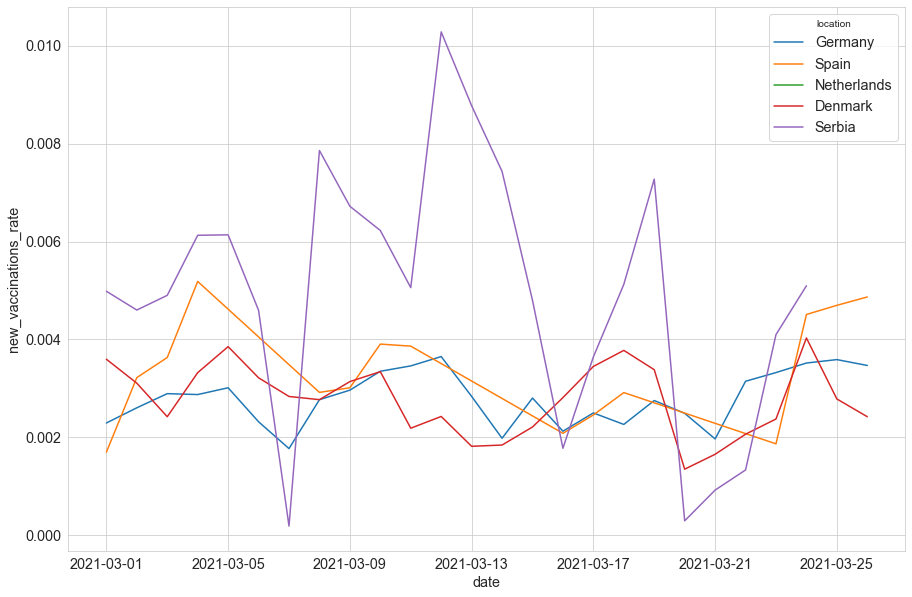

In [29]:
countries_plot = ['Germany', 'Spain', 'Netherlands', 'Denmark', 'Serbia']
df_plot = df_world.loc[pd.IndexSlice[countries_plot, '2021-03-01':], :].new_vaccinations_rate.reset_index()
sns.lineplot(data = df_plot, x='date', y='new_vaccinations_rate',hue='location', markers=True)

In [33]:
df_world.index.get_level_values(0).unique()

Index(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Vatican', 'Venezuela', 'Vietnam',
       'World', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='location', length=215)